# UseCase: Churn Prediction

A travers ce usecase, le but de guider d'apprendre par la pratique comment faire de la prediction d'attrition des clients.
Il comporte les etapes suivantes :
0. Import des librairies
1. Donnees et problématiques majeures
2. Préparation des variables(features) informatives
3. Creation de modèles prédictifs, évaluation de performances
4. Calcul des predictions sur un nouveau jeu de données et évaluation

## 1. Import des librairies

- Tout d'abord, importons quelques packages necessaires pour ce travail

In [1]:
import pandas as pd
import numpy as np
import os
# Machine Learning tools
from sklearn.model_selection import KFold, StratifiedKFold,train_test_split #, StratifiedShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier
# Librairie de visualisation super cool
import seaborn as sns # pip install seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings; 
warnings.simplefilter('ignore')

## 2.  Données et problématiques majeures

CHURN PREDICTION IN THE TELECOMMUNICATIONS SECTOR   
In these days, due to challenges resulted from
global competition, customer churn represents one of the
significant concerns for companies in different industries. With
a churn rate of 30%, the telecommunication sector takes the
first place on the list. In order to solve this problem, predictive
models need to be implemented to identify customers who are
at risk of churning

Churn data set, in C. L. Blake and C. J. Merz, UCI Repository of Machine Learning
Databases, http://www.ics.uci.edu/∼mlearn/MLRepository.html, University
of California, Department of Information and Computer Science, Irvine, CA, 1998. Also
available at the book series Web site.

### 2.1 Chargement des données

- Charger les données disponibles au format csv: <b> churn.data </b>
- Determiner la dimension et le nombre de instances
- Afficher quelques lignes de la dataframe
- Analyse descriptive des variables (ex: State, Phone, ...)

In [3]:
DATA_DIR=os.path.join('.', '/','data')
# Charger les données d'apprentissage 
data = pd.read_csv("./data/churn_train.csv", encoding='utf-8', sep=',')
print("churn train: {0}".format(data.shape))

churn train: (3333, 21)


In [4]:
pd.set_option("display.max_columns",99)
data.head(10)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


### 2.2 Analyse descriptive

Identifiant unique, target histogram, variables distribution
- Vérifier si variable manquantes

In [5]:
pd.isnull(data).values.any()

False

3333


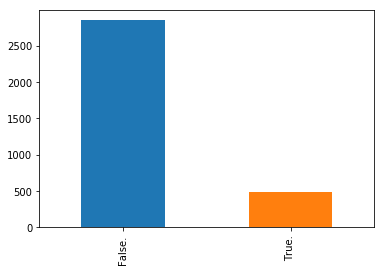

In [6]:
#data.describe()
print(len(data.Phone.value_counts()))
data["Churn?"].value_counts().plot(kind='bar')

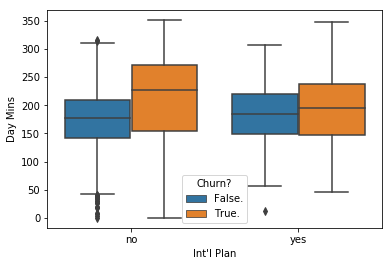

In [7]:
# Analyse des variables
sns.boxplot(x="Int'l Plan", y="Day Mins", hue="Churn?", data=data);

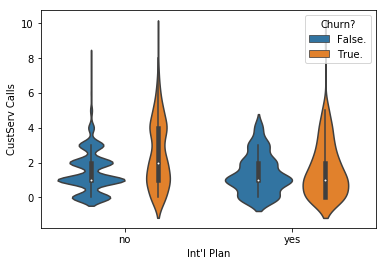

In [8]:
# Analyse des variables
sns.violinplot(x="Int'l Plan", y="CustServ Calls", hue="Churn?", data=data);

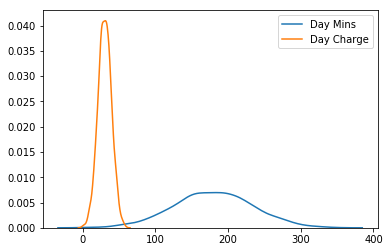

In [9]:
import warnings
warnings.filterwarnings("ignore")
sns.kdeplot(data['Day Mins'])#, bw=0.1)
sns.kdeplot(data['Day Charge'])#, bw=0.1)

### 2.2 Problématiques majeures liées à ces données

- Classes désequilibrées : 14.5% churn (print(data[data["Churn?"]=="True."].shape[0]/data.shape[0]))

## 3. Préparation des variables(features) informatives

### 3.1 Analyse/Encodage des variables

* Typologies des variables

In [10]:
vars_unique = ["Phone"]
vars_cat = ["Int'l Plan","VMail Plan", "State", "Churn?"]

* Encodage les features catégorielles en nombres, à l'aide de LabelEncoder()

In [11]:
from sklearn.preprocessing import LabelEncoder
# donnees catégorielles
le = dict()
# Encodage donnees catégorielles
print("Launch only on-time")
for c in vars_cat:
    print('encode:', c)
    le[c] = LabelEncoder()
    #data[c] = le[c].fit_transform(data[c]) #append(test[c]) # si catogories non couvertes
    le[c].fit(data[c])
    data[c] = le[c].transform(data[c])
    print(le[c].classes_)

Launch only on-time
encode: Int'l Plan
['no' 'yes']
encode: VMail Plan
['no' 'yes']
encode: State
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
encode: Churn?
['False.' 'True.']


In [12]:
# Affichage de la transfromation
data[[feat for feat in data.columns if feat not in vars_unique]].head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### 3.2 Caractéristiques informatives

In [13]:
# target and features 
target_name = "Churn?"
features_cols = [ feat for feat in data.columns if feat not in vars_unique+[target_name] ]

Variables importance de RandomForest

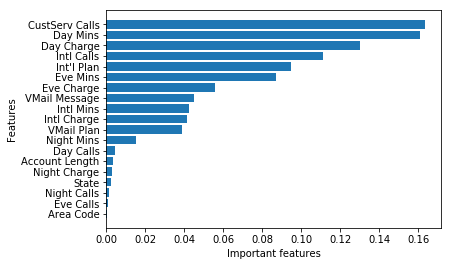

In [14]:
clf = GradientBoostingClassifier()
clf.fit(data[features_cols], data[target_name])
imp_feat, names0 = zip(*sorted(zip(clf.feature_importances_, data[features_cols].columns)))
topN=19
imp_feat, names = imp_feat[len(names0)-topN:], names0[len(names0)-topN:]
plt.barh(range(len(names)), imp_feat) #, align = 'center')
plt.yticks(range(len(names)), names)
plt.xlabel("Important features")
plt.ylabel("Features")
plt.show()

## 4. Modèles prédictifs, évaluation de performances

### 4.1. Performance metrics

In [15]:
# L'évaluation de performance en classification désequiliblée nécessite des metrics specifiques
from sklearn import metrics

def decide(y_prob, threshold=0.5):
    return (y_prob > threshold)*1

def roc_auc(y_predict,y_origin):
    fpr, tpr, thresholds = metrics.roc_curve(y_predict,y_origin, pos_label=1)
    return 100.*metrics.auc(fpr, tpr)

def accuracy(y_predict,y_origin):
    return 100.*(sum(y_predict == y_origin))/len(y_origin)

def tp_rate(y_predict,y_origin):
    tp = sum((y_predict == 1) & (y_origin == 1))
    fn = sum((y_predict == 0) & (y_origin == 1))
    return 100.*(tp)/(tp + fn)

def tn_rate(y_predict,y_origin):
    tn = sum((y_predict == 0) & (y_origin == 0))
    fp = sum((y_predict == 1) & (y_origin == 0))
    return 100.*(tn)/(tn+fp)

Fonction pour tracer la matrice de confusion

In [71]:
from matplotlib.collections import QuadMesh
import matplotlib.font_manager as fm

def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1
#

def configcell_text_and_colors(array_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=fz)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = 'g'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.27, 0.30, 0.27, 1.0]
        if(col == ccl - 1) and (lin == ccl - 1):
            carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = '%s\n%.2f%%' %(cell_val, per)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0\n0.0%'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('w')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.35, 0.8, 0.55, 1.0]
        else:
            oText.set_color('r')

    return text_add, text_del
#

def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm['sum_lin'] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc['sum_col'] = sum_col
    #print ('\ndf_cm:\n', df_cm, '\n\b\n')
#

def pretty_plot_confusion_matrix(df_cm, annot=True, cmap="Oranges", fmt='.2f', fz=11,
      lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    ax = sns.heatmap(df_cm, annot=annot, annot_kws={"size": fz}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='w', fmt=fmt)

    #set ticklabels rotation
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 10)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()

    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    text_add = []; text_del = [];
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts: #ax.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0]);
        posi += 1
        #print ('>>> pos: %s, posi: %s, val: %s, txt: %s' %(pos, posi, array_df[lin][col], t.get_text()))

        #set text
        txt_res = configcell_text_and_colors(array_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Confusion matrix')
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    plt.tight_layout()  #set layout slim
    plt.show()
#

def plot_confusion_matrix_from_data(y_test, predictions, columns=None, annot=True, cmap="Oranges",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[5,5], show_null_values=0, pred_val_axis='lin'):
    """
        plot confusion matrix function with y_test (actual values) and predictions (predic),
        whitout a confusion matrix yet
    """
    from sklearn.metrics import confusion_matrix
    from pandas import DataFrame

    #data
    if(not columns):
        #labels axis integer:
        ##columns = range(1, len(np.unique(y_test))+1)
        #labels axis string:
        from string import ascii_uppercase
        columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

    confm = confusion_matrix(y_test, predictions)
    cmap = 'Oranges';
    fz = 11;
    figsize=[9,9];
    show_null_values = 2
    df_cm = DataFrame(confm, index=columns, columns=columns)
    pretty_plot_confusion_matrix(df_cm, fz=fz, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)


### 4.2. Cross validation

Cross validation et gridsearsh

Maintenant que nous avons un modèle de base, nous allons creuser un peu plus loin afin de l'améliorer en optimisant les hyperparamètres du modèle. Pour ce faire nous allons procéder par validation croisée. A l'aide de celle-ci, nous allons chercher quel(s) paramètre(s) nous donne(nt) le meilleur score et enfin nous évaluerons la qualité du modèle sur le jeu de données test.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

X = data[features_cols]
y = data[target_name]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=777)

## GradientBoostingClassifier CV
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

gbclfCV = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)
gbclfCV.fit(X_train, y_train)
gbclfCV_pred_proba_train = gbclfCV.predict_proba(X_train)[:, 1]
gbclfCV_pred_proba_test = gbclfCV.predict_proba(X_test)[:, 1]
gbclfCV_pred_train = gbclfCV.predict(X_train)
gbclfCV_pred_test = gbclfCV.predict(X_test)
##############################################
######## Logistic Regression CV ############## 
params = [{"C": [0.01, 0.2, 0.5, 1, 5, 10, 20], "penalty": ["l1", "l2"]}]
logitCV = GridSearchCV(
    LogisticRegression(solver="liblinear"),
    params,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
logitCV = logitCV.fit(X_train, y_train)
logitCV_pred_proba_train = logitCV.predict_proba(X_train)[:, 1]
logitCV_pred_proba_test = logitCV.predict_proba(X_test)[:, 1]
logitCV_pred_train = logitCV.predict(X_train)
logitCV_pred_test = logitCV.predict(X_test)

# Calcul des predictions et evaluation
## Regression logistique - validation croisée

### Coefficients de la régression logistique

Un des avantages de la régression logistique est que nous pouvons obtenir les coefficients associés à chacune des variables. Nous avons utilisé une pénalisation L1, les coefficients sont donc seuillés à 0 si ils ont été jugés "inutiles" par le modèle.

Regardons ces coefficients :


In [20]:
coefficients = pd.Series(logitCV.best_estimator_.coef_.flatten(), 
                         index=X_train.columns).sort_values(ascending=False)
coefficients

Int'l Plan        2.011973
CustServ Calls    0.513027
Intl Charge       0.149418
Intl Mins         0.045307
Night Charge      0.042511
Day Charge        0.035135
VMail Message     0.032452
Eve Charge        0.014226
Day Mins          0.007023
Eve Mins          0.006468
State             0.003056
Day Calls         0.002537
Night Mins        0.001913
Account Length    0.001254
Eve Calls         0.000710
Night Calls       0.000452
Area Code        -0.000701
Intl Calls       -0.132988
VMail Plan       -1.949389
dtype: float64

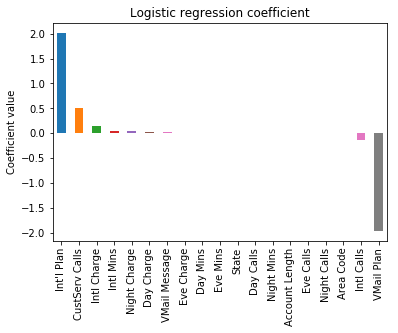

In [21]:
coefficients.plot(kind="bar")
plt.title("Logistic regression coefficient")
plt.ylabel("Coefficient value")
plt.show()

In [53]:
def classification_metrics(y, y_pred):
    return pd.DataFrame(
        {
            "roc_auc": roc_auc(y_pred,y),
            "accuracy": accuracy(y_pred,y),
            "tp_rate":tp_rate(y_pred,y),
            "tn_rate":tn_rate(y_pred,y)
        },
        index=[0])

In [55]:
print("Logistic regression CV - Classification metrics for train data")
print(classification_metrics(y_train, logitCV_pred_train))
print("Logistic regression CV - Classification metrics for test data")
print(classification_metrics(y_test, logitCV_pred_test))

Logistic regression CV - Classification metrics for train data
     roc_auc   accuracy    tp_rate    tn_rate
0  72.471818  86.196549  23.333333  96.968366
Logistic regression CV - Classification metrics for test data
     roc_auc   accuracy    tp_rate   tn_rate
0  74.762991  86.956522  17.204301  98.25784


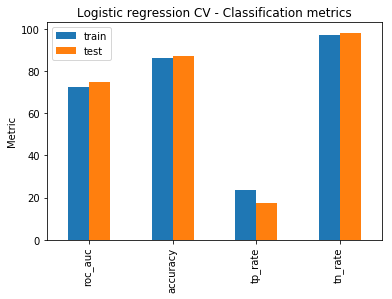

In [76]:
logitCV_CM = pd.concat(
    [
        classification_metrics(y_train, logitCV_pred_train).T[0].rename("train"),
        classification_metrics(y_test, logitCV_pred_test).T[0].rename("test")
    ],
    axis=1)
logitCV_CM.plot(kind="bar")
plt.title("Logistic regression CV - Classification metrics")
plt.ylabel("Metric")
plt.show()

In [59]:
def roc_curves_plot(y_train, pred_proba_train, y_test, pred_proba_test,title):
    false_positive_rate_train, true_positive_rate_train, _ = metrics.roc_curve(
        y_train, pred_proba_train)
    roc_auc_train = metrics.auc(false_positive_rate_train,
                                true_positive_rate_train)

    false_positive_rate_test, true_positive_rate_test, _ = metrics.roc_curve(
        y_test, pred_proba_test)
    roc_auc_test = metrics.auc(false_positive_rate_test,
                               true_positive_rate_test)

    plt.title(title)
    plt.plot(
        false_positive_rate_train,
        true_positive_rate_train,
        'b',
        label='AUC Train = %0.4f' % roc_auc_train)
    plt.plot(
        false_positive_rate_test,
        true_positive_rate_test,
        'g',
        label='AUC Test = %0.4f' % roc_auc_test)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

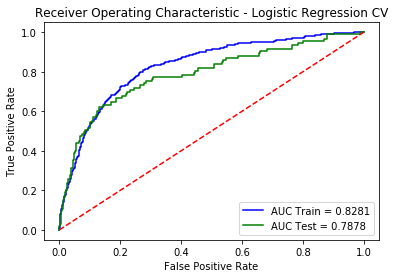

In [60]:
roc_curves_plot(y_train, logitCV_pred_proba_train, 
                y_test, logitCV_pred_proba_test,
               "Receiver Operating Characteristic - Logistic Regression CV")

#### Matrice de confusion du train pour la Regression logistique CV

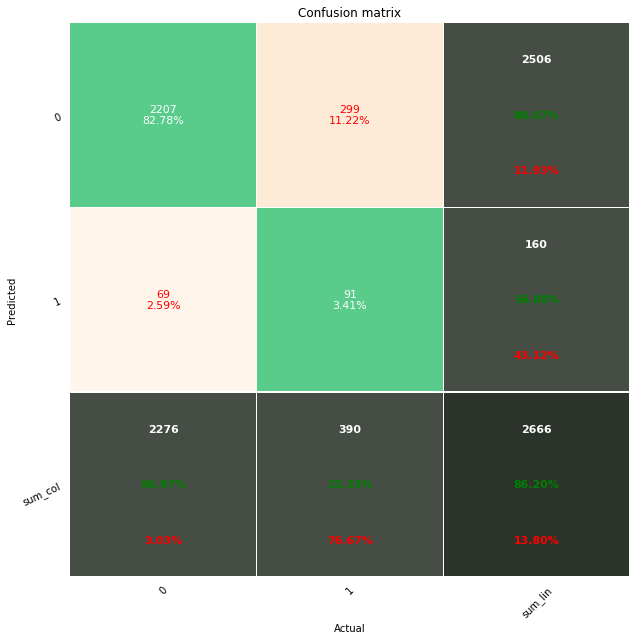

In [72]:
plot_confusion_matrix_from_data(y_train, logitCV_pred_train,columns=['0','1'],figsize=[4,4])

#### Matrice de confusion du test pour la Regression logistique CV

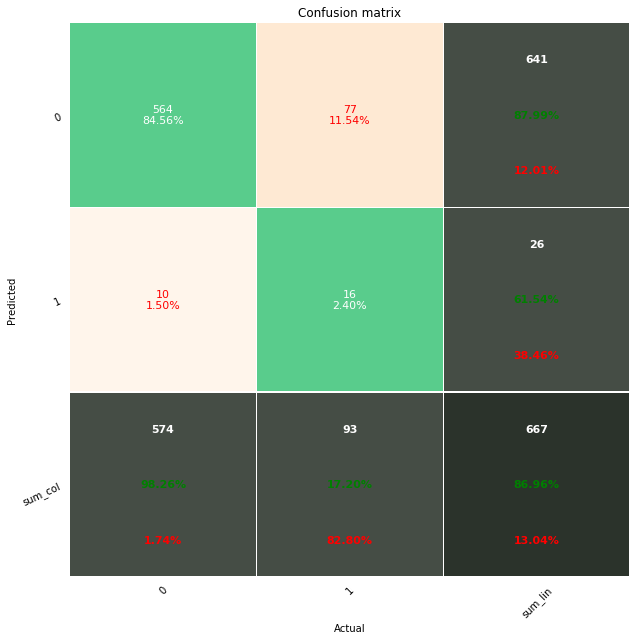

In [73]:
plot_confusion_matrix_from_data(y_test, logitCV_pred_test,columns=['0','1'],figsize=[4,4])

### Paramètres optimaux pour la regression logistique

In [61]:
logitCV.best_estimator_

LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## Gradient Boosting - validation croisée
### Features importance

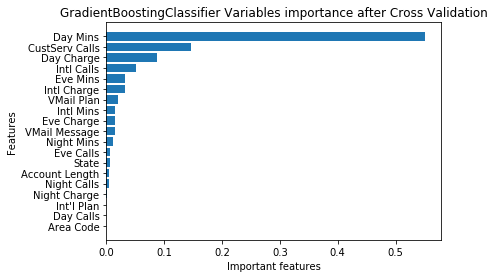

In [66]:
imp_feat, names0 = zip(*sorted(zip(gbclfCV.best_estimator_.feature_importances_, X_train.columns)))
topN=19
imp_feat, names = imp_feat[len(names0)-topN:], names0[len(names0)-topN:]
plt.barh(range(len(names)), imp_feat) #, align = 'center')
plt.yticks(range(len(names)), names)
plt.xlabel("Important features")
plt.ylabel("Features")
plt.title("GradientBoostingClassifier Variables importance after Cross Validation")
plt.show()

In [67]:
print("Logistic regression CV - Classification metrics for train data")
print(classification_metrics(y_train, gbclfCV_pred_train))
print("Logistic regression CV - Classification metrics for test data")
print(classification_metrics(y_test, gbclfCV_pred_test))

Logistic regression CV - Classification metrics for train data
     roc_auc   accuracy   tp_rate    tn_rate
0  90.341598  86.009002  4.615385  99.956063
Logistic regression CV - Classification metrics for test data
     roc_auc   accuracy   tp_rate    tn_rate
0  73.202417  86.206897  3.225806  99.651568


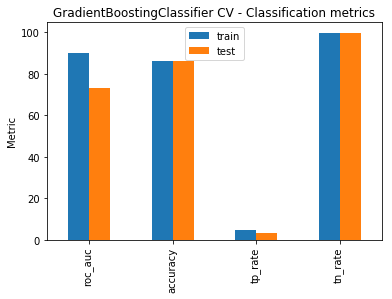

In [77]:
gbclfCV_CM = pd.concat(
    [
        classification_metrics(y_train, gbclfCV_pred_train).T[0].rename("train"),
        classification_metrics(y_test, gbclfCV_pred_test).T[0].rename("test")
    ],
    axis=1)
gbclfCV_CM.plot(kind="bar")
plt.title("GradientBoostingClassifier CV - Classification metrics")
plt.ylabel("Metric")
plt.show()

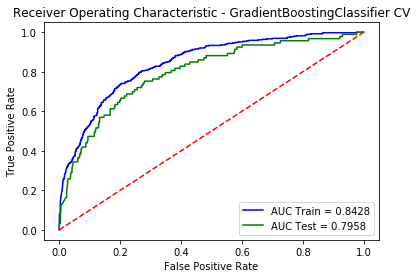

In [69]:
roc_curves_plot(y_train,  gbclfCV_pred_proba_train, 
                y_test,  gbclfCV_pred_proba_test,
               "Receiver Operating Characteristic - GradientBoostingClassifier CV")

#### Matrice de confusion du train pour le GradientBoostingClassifier CV

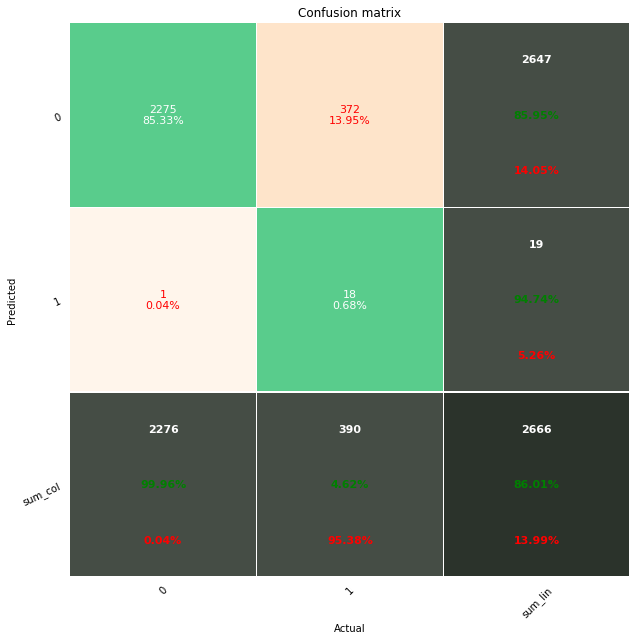

In [75]:
plot_confusion_matrix_from_data(y_train, gbclfCV_pred_train,columns=['0','1'],figsize=[4,4])

#### Matrice de confusion du test pour le GradientBoostingClassifier CV

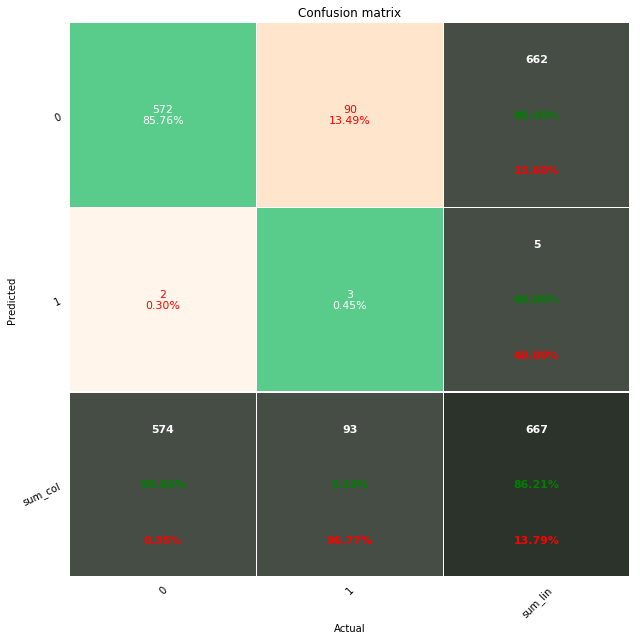

In [74]:
plot_confusion_matrix_from_data(y_test, gbclfCV_pred_test,columns=['0','1'],figsize=[4,4])

### Paramètres optimaux pour le GradientBoostingClassifier

In [70]:
gbclfCV.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=0.1, min_samples_split=0.24545454545454548,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### Comparaison des métriques des deux modèles après la recherche des paramètres optimaux par validation croisée.

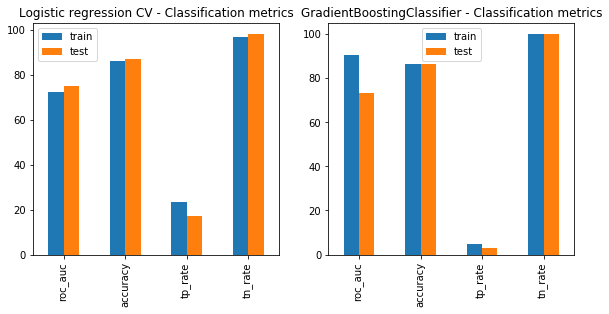

In [81]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(9.7, 4.27)
logitCV_CM.plot(kind="bar", ax=ax[0],
                title="Logistic regression CV - Classification metrics")
gbclfCV_CM.plot(kind="bar", ax=ax[1],
                title="GradientBoostingClassifier - Classification metrics")
fig.show()

L'analyse croisée des métriques ci dessus montre que, après la recherche des paramètres optimaux par validation croisée, la **Regression Logistique** a de bonne performances par rapport au **Gradient Boosting Classifier**.
La métrique `tp_rape (True Positive Rate)` qui représente le ratio des vrais positifs prédit est plus intéressant à travers ce modèle, et dans notre cas d'étude, il est important de connaître un maximum de client sujet au **Churn**.
Ce modèle offre de meilleurs performances malgré le déséquibre qui existe entre les deux classes, il prédit un maximum de valeurs positives dans la classe minoritaire. Nous allons le retenir pour la suite des travaux.

### Reglage optimal et apprentissage du modèle

In [82]:
#<??> Appliquer les paramètres optimaux du modele
final_logitCV = LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
#<??> On entraine de nouveau le modèle, cette fois sur l'intégralité des données
final_logitCV.fit(data[features_cols], data[target_name])

LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Charger et encoder un nouveau jeu de données

In [83]:
# Charger les données test
test = pd.read_csv("./data/churn_test.csv", encoding='utf-8', sep=',')
print("churn test: {0}".format(test.shape))

churn test: (1667, 21)


In [84]:
# ATTENTION: Encoder les variables catégorielles avant predictions
# => utiliser le même mapping le.
for c in vars_cat:
    print('encode:', c)
    test[c] = le[c].transform(test[c])
# Affichage de la transfromation
test[[feat for feat in test.columns if feat not in vars_unique]].head()

encode: Int'l Plan
encode: VMail Plan
encode: State
encode: Churn?


,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,11,101,510,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,26,137,510,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,35,103,408,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,32,99,415,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,40,108,415,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


### Evaluer et conclure

In [85]:
##<??> Calculs des predictions pour une nouvelle base de clients
new_pred = final_logitCV.predict(test[features_cols])

In [91]:
#<??> evaluer des performances en comparant les predictions et les valeurs references de churn? dans test
y_test = test["Churn?"]
# calculer les perfs auc, acc, tp, tn (s'inspirer des calculs effectués dans la cellule cross-validation)
classification_metrics(y_test, new_pred)

,roc_auc,accuracy,tp_rate,tn_rate
0,73.058215,87.222555,18.75,97.851698


### Matrice de confusion de la prédiction

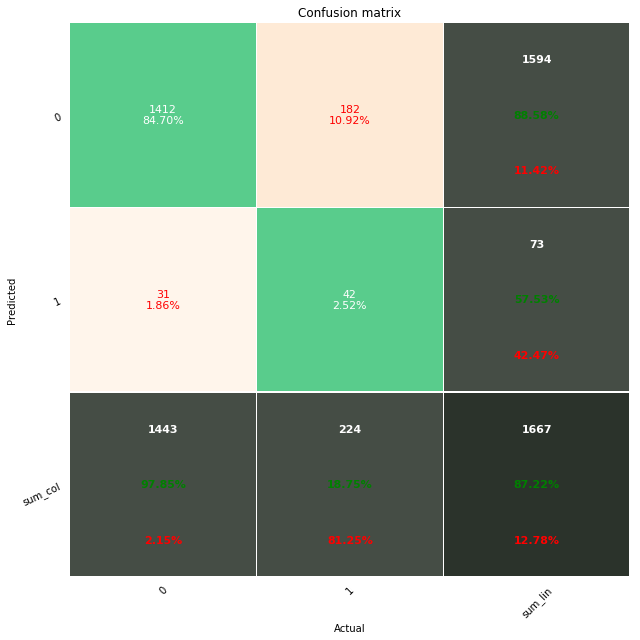

In [92]:
plot_confusion_matrix_from_data(y_test, new_pred,columns=['0','1'],figsize=[4,4])

### Conclusion 
Cet exercice nous apermis de toucher du doigt la problématique lié au traitement de données avec des classes déséquilibrées. 

Le déséquilibre des classes dans notre cas d’étude est un problème, car la plupart des algorithmes de classification se basent sur l’exactitude (ou l’accuracy) pour construire leurs modèles. Voyant que la grande majorité des observations appartient à la même catégorie, nous nous retrouvons avec un modèle peu intelligent qui prédit toujours la classe dominante.

Le choix de bonne métriques pour l'évaluation des modèles est déterminant. La validation croisée, nous a permis de faire varier les hyperparamètres de deux modèles différents et d'en retenir les meilleurs.
La métrique sur laquelle nous nous sommes basés pour retenir notre modèle finale est le `tp_rate`, car dans notre cas d'étude, il est important de connaître un maximum de client sujet au **Churn**.

## Piste d'amélioration : l’oversampling

Une technique consiste tout simplement à rééquilibrer notre jeu de données. Soit en faisant de l’undersampling, en enlevant des données de la classe majoritaire, soit en faisant de l’oversampling, en rajoutant des nouvelles données dans la classe minoritaire (Nous allons appliqué cette méthode).

In [96]:
from imblearn.over_sampling import SMOTE

In [97]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(data[features_cols], data[target_name])

In [98]:
def plot_2d_space(X, y, label='Classes'):
   colors = ['#1F77B4', '#FF7F0E']
   markers = ['o', 's']
   for l, c, m in zip(np.unique(y), colors, markers):
       plt.scatter(
           X[y==l, 0],
           X[y==l, 1],
           c=c, label=l, marker=m
       )
   plt.title(label)
   plt.legend(loc='upper right')

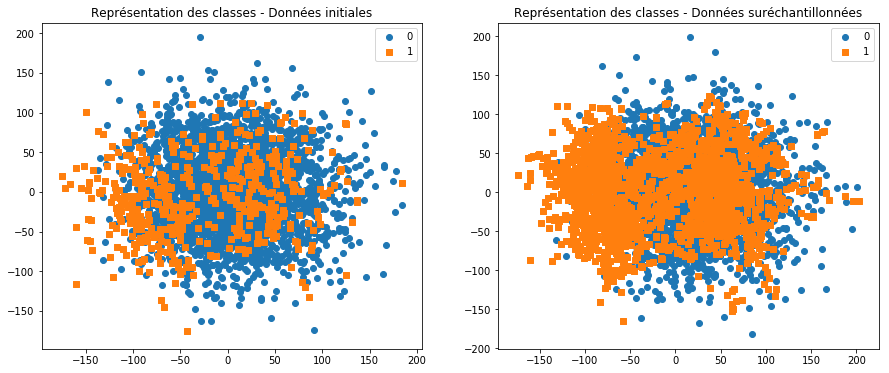

In [99]:
from sklearn.decomposition import PCA
import matplotlib.gridspec as gridspec

pca = PCA(n_components=2)
X_train_sm_pca = pca.fit_transform(x_train_res)
X_train_pca = pca.fit_transform(data[features_cols])
fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 3])
ax0 = plt.subplot(gs[0])
plot_2d_space(X_train_pca, data[target_name], 'Représentation des classes - Données initiales')
ax1 = plt.subplot(gs[1])
plot_2d_space(X_train_sm_pca, y_train_res, 'Représentation des classes - Données suréchantillonnées')
plt.show()

### Regression logistique : Apprentissage du modèle sur les données suréchantillonnées.

In [100]:
final_logitCV_2 = LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
final_logitCV_2.fit(x_train_res, y_train_res)

LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Evaluation

In [101]:
new_pred_res = final_logitCV_2.predict(test[features_cols])

In [102]:
classification_metrics(y_test, new_pred_2)

,roc_auc,accuracy,tp_rate,tn_rate
0,92.609695,88.422316,14.285714,99.9307


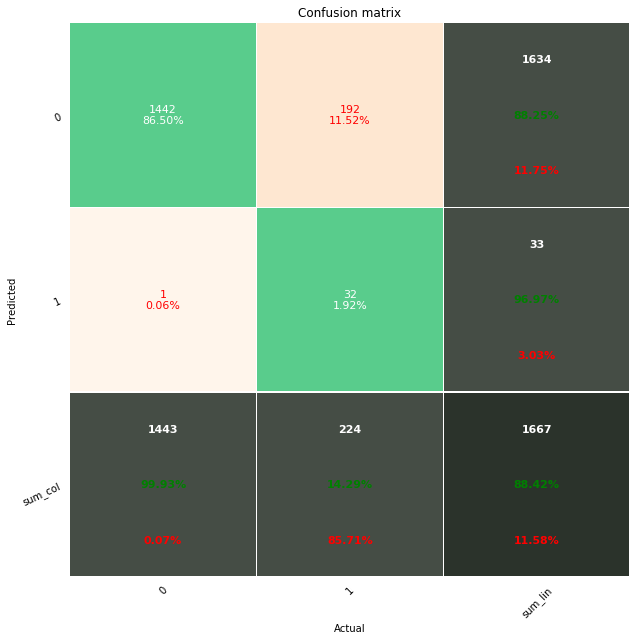

In [103]:
plot_confusion_matrix_from_data(y_test, new_pred_2,columns=['0','1'],figsize=[4,4])

### GradientBoostingClassifier : Apprentissage du modèle sur les données suréchantillonnées.

In [105]:
final_gbclfCV = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                          learning_rate=0.2, loss='deviance', max_depth=5,
                                          max_features='log2', max_leaf_nodes=None,
                                          min_impurity_decrease=0.0, min_impurity_split=None,
                                          min_samples_leaf=0.1, min_samples_split=0.24545454545454548,
                                          min_weight_fraction_leaf=0.0, n_estimators=10,
                                          n_iter_no_change=None, presort='auto', random_state=None,
                                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                                          verbose=0, warm_start=False)
final_gbclfCV.fit(x_train_res, y_train_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=0.1, min_samples_split=0.24545454545454548,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### Evaluation

In [106]:
new_pred_res_gb = final_gbclfCV.predict(test[features_cols])

In [107]:
classification_metrics(y_test, new_pred_res_gb)

,roc_auc,accuracy,tp_rate,tn_rate
0,72.104903,85.782843,76.785714,87.179487


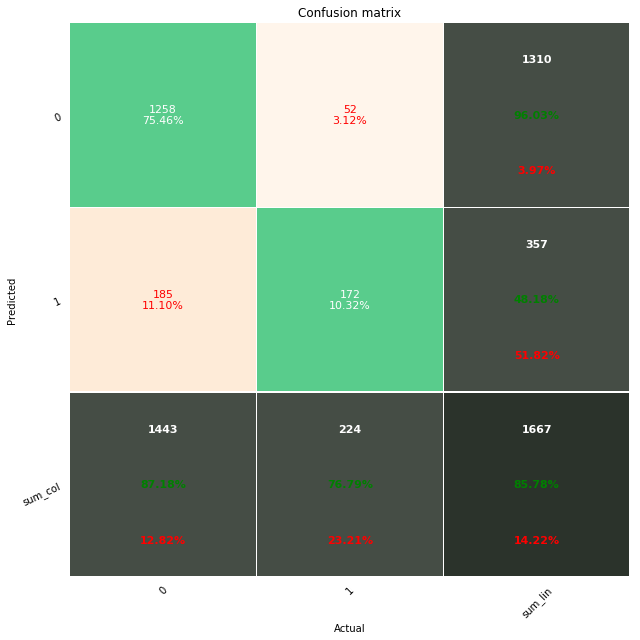

In [108]:
plot_confusion_matrix_from_data(y_test, new_pred_res_gb,columns=['0','1'],figsize=[4,4])

### Conclusion
Sur un jeu de donnée suréchantillonnée avec des classes équilibrées, le `GradientBoostingClassifier` offre de meilleur performance que la `Regression Logistique`. Ceci en appliquant les meilleurs valeurs des hyperparamètres obtenus lors de la validation croisée sur le jeu de donnée initial avec des classes déséquilibrées. 
Le résultat serait peut être différent si nous appliquons de nouveaux une validation croisée sur le jeu de donnée suréchantillonné.